In [1]:
#component failure prediction

In [2]:
# Generic problem statement related to automotive , Manufacturing ,Maintenance .

problem statement:- 
    (1)Analysis of Reason of Failure
    (2)Build a model to predict failure YES/NO.
    (3)Build a model to predict Failure type

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
original_data=pd.read_csv("component_failure_prediction.csv")

In [19]:
df=original_data.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [21]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


 Exploratory Data Analysis

In [22]:
df.drop(["UDI","Product ID"],inplace=True,axis=1)

In [23]:
df.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure


In [24]:
df["Target"].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [26]:
df["Failure Type"].value_counts(normalize=True)

No Failure                  0.9652
Heat Dissipation Failure    0.0112
Power Failure               0.0095
Overstrain Failure          0.0078
Tool Wear Failure           0.0045
Random Failures             0.0018
Name: Failure Type, dtype: float64

In [27]:
# lets do some evaluation on the Target and Valire type.
# basically we want to check the contrdictory between the target variables.

In [28]:
df_failure=df[df["Target"]==1]

In [29]:
df_failure.head(20)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
168,L,298.4,308.3,1433,62.3,20,1,Power Failure
194,M,298.2,308.5,2678,10.7,86,1,Power Failure
207,M,298.4,308.7,1421,60.7,119,1,Power Failure
242,L,298.0,308.2,1348,58.8,202,1,Overstrain Failure
248,L,298.0,308.3,1362,56.8,216,1,Overstrain Failure


In [30]:
df_failure["Failure Type"].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [31]:
#lets identify those observation where the contradictory exist between the Target variable

In [32]:
df_failure[df_failure["Failure Type"]=="No Failure"]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [33]:
df.shape

(10000, 8)

In [34]:
drop_no_failure=df_failure[df_failure["Failure Type"]=="No Failure"].index

In [35]:
drop_no_failure

Int64Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [36]:
df1=df.drop(drop_no_failure,axis=0)
df1.shape

(9991, 8)

In [37]:
df_no_failure=df1[df1["Target"]==0]

In [38]:
df_no_failure["Failure Type"].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [39]:
df_no_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [40]:
df_no_failure[df_no_failure["Failure Type"]=="Random Failures"]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [41]:
drop_random_failure=df_no_failure[df_no_failure["Failure Type"]=="Random Failures"].index

In [42]:
drop_random_failure

Int64Index([1221, 1302, 1748, 2072, 2559, 3065, 3452, 5471, 5489, 5495, 5509,
            5553, 5639, 6091, 6913, 6960, 7488, 7868],
           dtype='int64')

In [43]:
df2=df1.drop(drop_random_failure,axis=0)

In [44]:
df2.shape

(9973, 8)

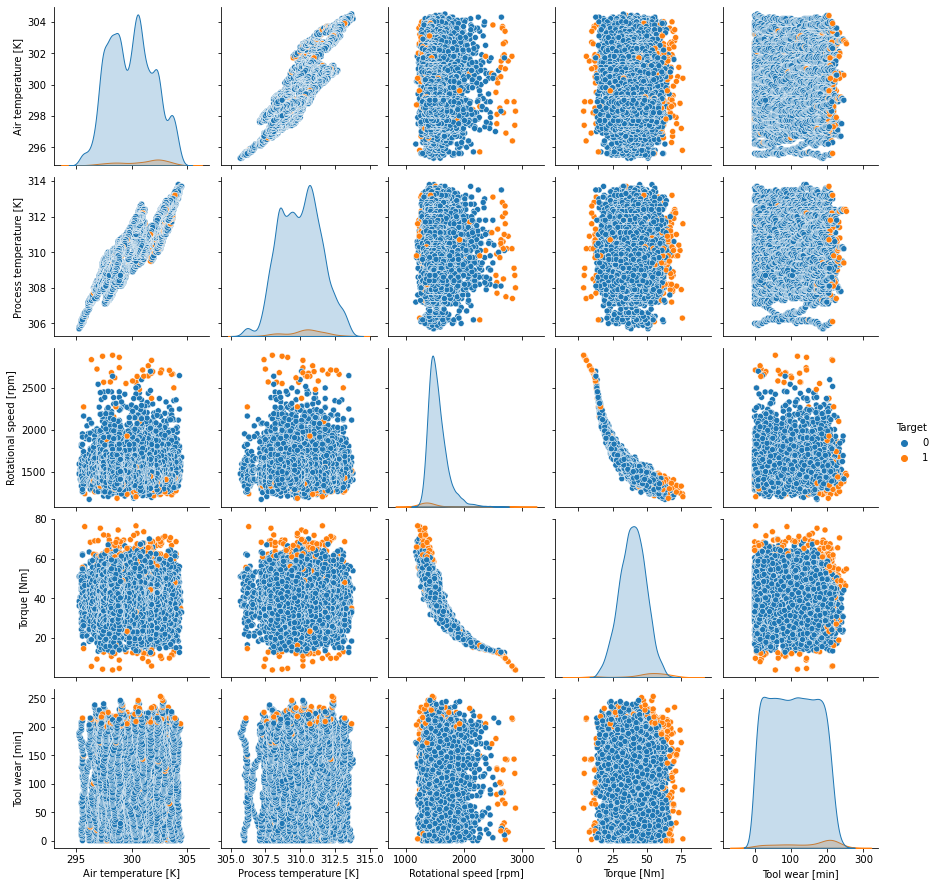

In [45]:
sns.pairplot(df2,hue="Target")

WITH RESPECT TO TORQUE

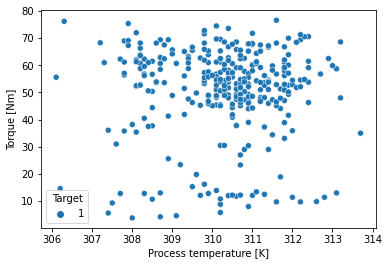

In [46]:
sns.scatterplot(data=df2[df2['Target']==1],x="Process temperature [K]",y="Torque [Nm]",hue="Target")

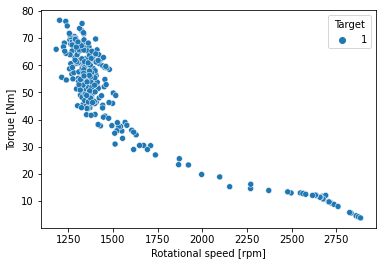

In [47]:
sns.scatterplot(data=df2[df2['Target']==1],y="Torque [Nm]",x="Rotational speed [rpm]",hue="Target")

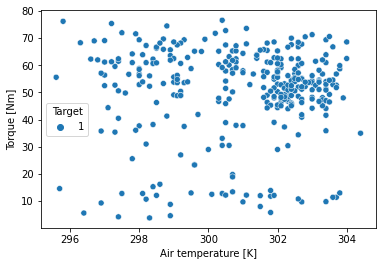

In [48]:
sns.scatterplot(data=df2[df2['Target']==1],y="Torque [Nm]",x="Air temperature [K]",hue="Target")

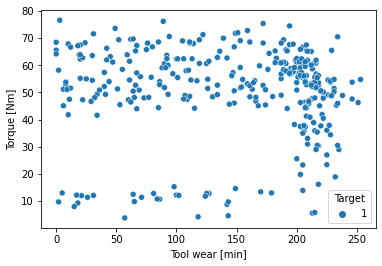

In [49]:
sns.scatterplot(data=df2[df2['Target']==1],x="Tool wear [min]",y="Torque [Nm]",hue="Target")

- ##  HIGHER THE TORQUE  VALUE ,nof ERRORS ARE MORE

WRT ROTATIONAL SPEED

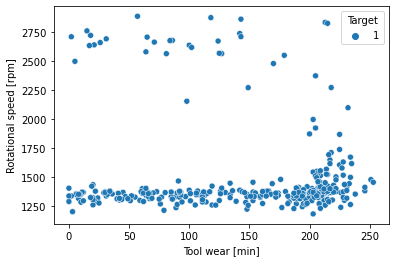

In [50]:
sns.scatterplot(data=df2[df2['Target']==1],x="Tool wear [min]",y="Rotational speed [rpm]",hue="Target")

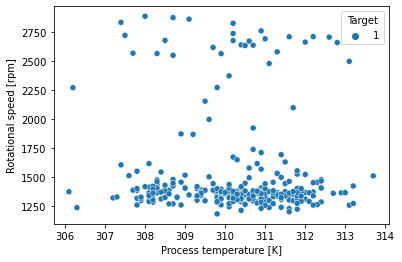

In [51]:
sns.scatterplot(data=df2[df2['Target']==1],x="Process temperature [K]",y="Rotational speed [rpm]",hue="Target")

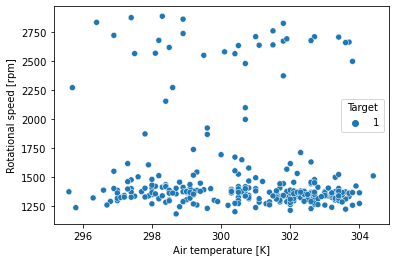

In [52]:
sns.scatterplot(data=df2[df2['Target']==1],x="Air temperature [K]",y="Rotational speed [rpm]",hue="Target")

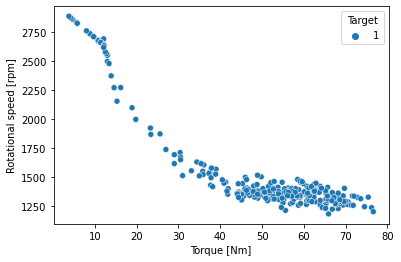

In [53]:
sns.scatterplot(data=df2[df2['Target']==1],x="Torque [Nm]",y="Rotational speed [rpm]",hue="Target")

- ##  LOWER the ROTATIONAL SPEED value HIGHER the noof errors

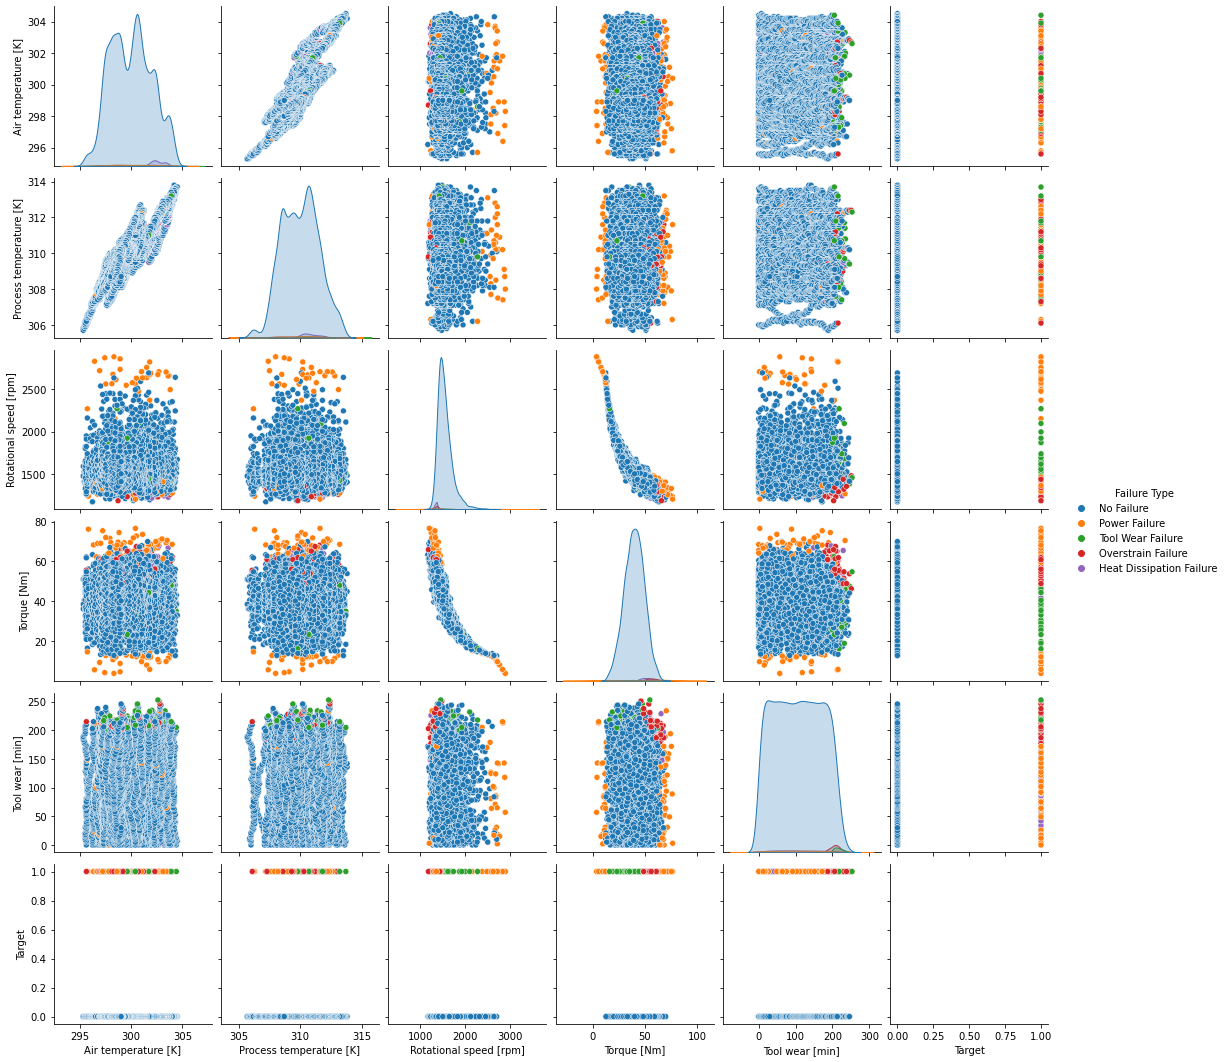

In [55]:
sns.pairplot(df2,hue="Failure Type")

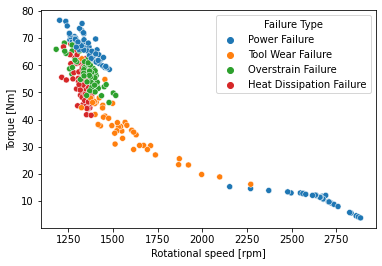

In [56]:
# scatter plot
sns.scatterplot(data=df2[df2["Target"]==1],x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type")

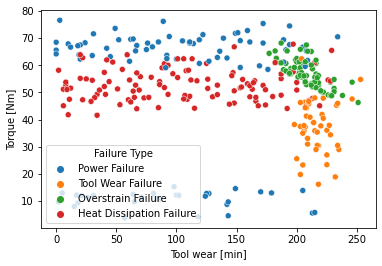

In [57]:
sns.scatterplot(data=df2[df2["Target"]==1],x="Tool wear [min]",y="Torque [Nm]",hue="Failure Type")

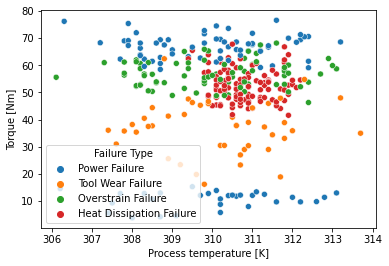

In [58]:
sns.scatterplot(data=df2[df2['Target']==1],x="Process temperature [K]",y="Torque [Nm]",hue="Failure Type")

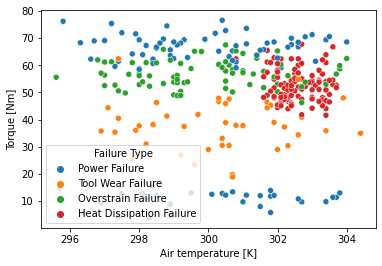

In [59]:
sns.scatterplot(data=df2[df2['Target']==1],x="Air temperature [K]",y="Torque [Nm]",hue="Failure Type")

## we can avoid power ,overstrain,heat failure by decrease in tarque

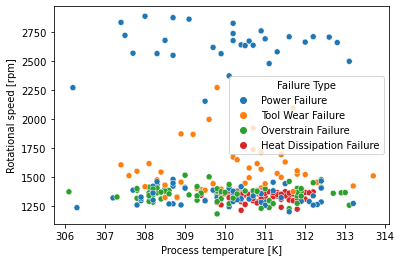

In [60]:
sns.scatterplot(data=df2[df2['Target']==1],x="Process temperature [K]",y="Rotational speed [rpm]",hue="Failure Type")

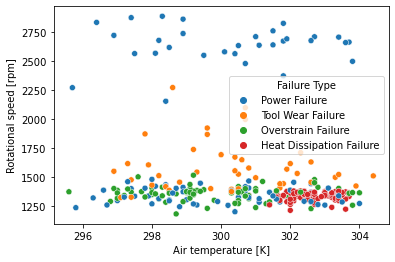

In [61]:
sns.scatterplot(data=df2[df2['Target']==1],x="Air temperature [K]",y="Rotational speed [rpm]",hue="Failure Type")

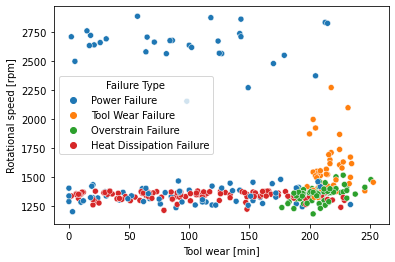

In [62]:
sns.scatterplot(data=df2[df2['Target']==1],x="Tool wear [min]",y="Rotational speed [rpm]",hue="Failure Type")

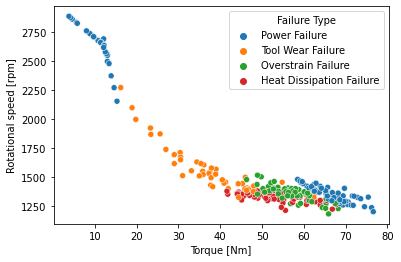

In [63]:
sns.scatterplot(data=df2[df2['Target']==1],x="Torque [Nm]",y="Rotational speed [rpm]",hue="Failure Type")

## by higher the value of Rotational speed we can lower the maximum no of errors 

In [ ]:
# we have 3 category of components -- L,M,H 

In [71]:
df2["Type"].value_counts()

L    5984
M    2991
H     998
Name: Type, dtype: int64

In [72]:
# just evaluate the failure percentage of L,M,H type components

In [73]:
Low_price=df2[df2["Type"]=="L"]
Low_price

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
6,L,298.1,308.6,1558,42.4,14,0,No Failure
...,...,...,...,...,...,...,...,...
9988,L,298.9,308.6,1771,24.1,213,0,No Failure
9990,L,298.8,308.5,1527,36.2,3,0,No Failure
9992,L,298.8,308.4,1484,39.2,8,0,No Failure
9993,L,298.8,308.4,1401,47.3,10,0,No Failure


In [74]:
df2['Target'].value_counts()

0    9643
1     330
Name: Target, dtype: int64

In [75]:
Low_price["Target"].value_counts()

0    5753
1     231
Name: Target, dtype: int64

In [76]:
Medium_price=df2[df2["Type"]=="M"]
Medium_price["Target"].value_counts()

0    2912
1      79
Name: Target, dtype: int64

In [77]:
High_price=df2[df2["Type"]=="H"]
High_price["Target"].value_counts()

0    978
1     20
Name: Target, dtype: int64

- #there is no major impact of price 

In [80]:
# correlation between the variables

In [81]:
df2

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [82]:
corr_matrix=df2.corr()# by defautl pearson 

In [83]:
corr_matrix

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Air temperature [K],1.000000,0.876068,0.023332,-0.014553,0.014370,0.083066
Process temperature [K],0.876068,1.000000,0.020200,-0.015275,0.013970,0.035997
Rotational speed [rpm],0.023332,0.020200,1.000000,-0.875069,-0.000110,-0.044042
Torque [Nm],-0.014553,-0.015275,-0.875069,1.000000,-0.002552,0.193420
Tool wear [min],0.014370,0.013970,-0.000110,-0.002552,1.000000,0.106337
Target,0.083066,0.035997,-0.044042,0.193420,0.106337,1.000000


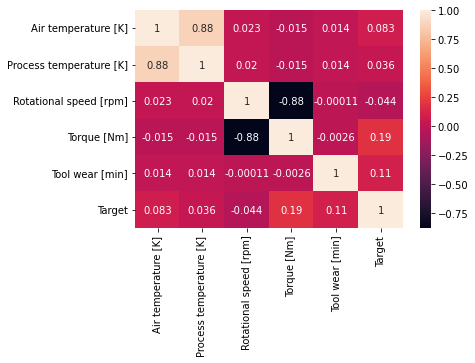

In [84]:
sns.heatmap(corr_matrix,annot=True)

In [89]:
df2.drop('Process temperature [K]',axis=1,inplace=True)

In [51]:
# lets do some outliers

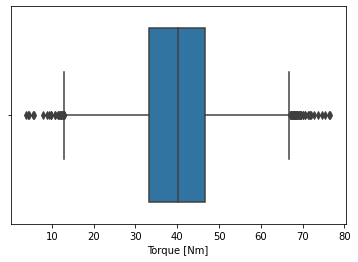

In [90]:
sns.boxplot(data=df2,x="Torque [Nm]")

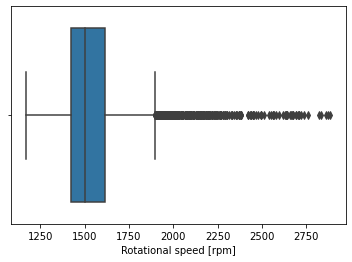

In [91]:
sns.boxplot(data=df2,x="Rotational speed [rpm]")

In [92]:
df2["Type"].value_counts()

L    5984
M    2991
H     998
Name: Type, dtype: int64

In [93]:
# mapping approach to convert categorical to numeric

In [94]:
df2["Type"]=df2["Type"].map({"L":0,"M":1,"H":2})

In [95]:
df2["Failure Type"].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

In [96]:
df2["Failure Type"]=df2["Failure Type"].map({"No Failure":0,"Heat Dissipation Failure":1,
                                             "Power Failure":2,"Overstrain Failure":3,
                                             "Tool Wear Failure":4})

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type                    9973 non-null   int64  
 1   Air temperature [K]     9973 non-null   float64
 2   Rotational speed [rpm]  9973 non-null   int64  
 3   Torque [Nm]             9973 non-null   float64
 4   Tool wear [min]         9973 non-null   int64  
 5   Target                  9973 non-null   int64  
 6   Failure Type            9973 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 943.3 KB


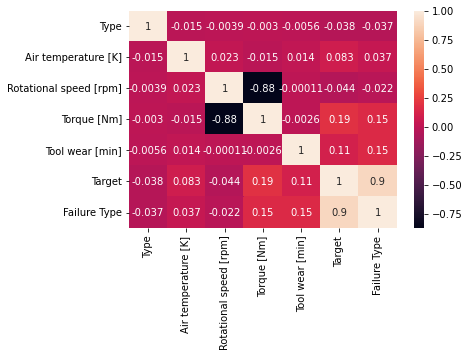

In [99]:
sns.heatmap(df2.corr(),annot=True)

Data Mining

In [100]:
# create independent and dependent variable

In [101]:
# model for Target - binary classification 

In [102]:
X=df2.drop(["Target","Failure Type"],axis=1)

In [103]:
Y=df2["Target"]

In [104]:
from sklearn.model_selection import  train_test_split,StratifiedShuffleSplit,cross_validate

In [105]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,stratify=Y,random_state=100)

In [106]:
from sklearn.ensemble  import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [108]:
rf= RandomForestClassifier()
bg= BaggingClassifier()
gb=GradientBoostingClassifier()#scaling is imp
ad=AdaBoostClassifier()
dt=DecisionTreeClassifier(class_weight='balanced')
log=LogisticRegression(class_weight='balanced')

In [109]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [110]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

In [111]:
scaler=MinMaxScaler(feature_range=(-1,1))

In [112]:
X_train_scaled=scaler.fit_transform(x_train)

In [113]:
X_train_scaled

array([[ 1.        , -0.34782609, -0.37369034, -0.23076923, -0.93495935],
       [-1.        ,  0.47826087, -0.57508731, -0.02197802, -0.78861789],
       [ 0.        , -0.10869565, -0.38998836, -0.32417582,  0.63414634],
       ...,
       [ 0.        ,  0.47826087, -0.48777648, -0.27197802, -0.34146341],
       [-1.        ,  0.32608696, -0.50873108, -0.10714286, -0.6504065 ],
       [-1.        , -0.10869565, -0.47147846, -0.18131868,  0.76422764]])

In [114]:
X_test_scaled=scaler.fit_transform(x_test)

In [115]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=x_train.columns)

In [116]:
X_test_scaled=pd.DataFrame(X_test_scaled, columns=x_test.columns)

In [117]:
for model in[rf,bg,gb,ad,dt,log]:
    print("********"*3)
    print('performance of model:', model)
    print('#########'*3)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=20,random_state=100)
    scoring=['f1_macro','precision_macro','recall_macro']
    cross_val_score = cross_validate(model,X,Y,scoring=scoring,cv=cv)
    
    f1_test_cv=cross_val_score['test_f1_macro']
    precision_test_cv=cross_val_score['test_precision_macro'].mean()
    recall_test_cv=cross_val_score['test_recall_macro']
                             
    print("f1 test score", f1_test_cv) 
    print("precision test score", precision_test_cv)
    print("recall test score", recall_test_cv)
   

************************
performance of model: RandomForestClassifier()
###########################
f1 test score [1.         1.         0.48717949 1.         1.         0.48717949
 1.         1.         1.         0.48717949]
precision test score 0.8425
recall test score [1.  1.  0.5 1.  1.  0.5 1.  1.  1.  0.5]
************************
performance of model: BaggingClassifier()
###########################
f1 test score [0.48717949 1.         0.48717949 1.         1.         0.48717949
 1.         1.         1.         0.48717949]
precision test score 0.79
recall test score [0.5 1.  0.5 1.  1.  0.5 1.  1.  1.  0.5]
************************
performance of model: GradientBoostingClassifier()
###########################
f1 test score [1.         0.48717949 0.48717949 1.         1.         0.48717949
 1.         1.         0.48717949 0.48717949]
precision test score 0.7375
recall test score [1.  0.5 0.5 1.  1.  0.5 1.  1.  0.5 0.5]
************************
performance of model: AdaBoostCla

In [118]:
for model in[rf,bg,gb,ad,dt,log]:
    print("********"*3)
    print('performance of model:', model)
    print('#########'*3)
#     cv=StratifiedShuffleSplit(n_splits=10,test_size=20,random_state=100)
    scoring=['f1_macro','precision_macro','recall_macro']
    cross_val_score = cross_validate(model,X,Y,scoring=scoring,cv=5)
    
    f1_test_cv=cross_val_score['test_f1_macro']
    precision_test_cv=cross_val_score['test_precision_macro'].mean()
    recall_test_cv=cross_val_score['test_recall_macro']
                             
    print("f1 test score", f1_test_cv) 
    print("precision test score", precision_test_cv)
    print("recall test score", recall_test_cv)

************************
performance of model: RandomForestClassifier()
###########################
f1 test score [0.84709768 0.73297343 0.37935065 0.74846861 0.83524346]
precision test score 0.8258045024833519
recall test score [0.79389934 0.66562986 0.48059522 0.69437634 0.77168993]
************************
performance of model: BaggingClassifier()
###########################
f1 test score [0.82816537 0.71670185 0.37147492 0.75112268 0.85114637]
precision test score 0.7922324468409869
recall test score [0.79940148 0.67741175 0.48511947 0.69463567 0.78710078]
************************
performance of model: GradientBoostingClassifier()
###########################
f1 test score [0.81975389 0.73027225 0.58350893 0.76305157 0.84772814]
precision test score 0.8182544947004585
recall test score [0.81273858 0.66537066 0.68845139 0.70952785 0.78684144]
************************
performance of model: AdaBoostClassifier()
###########################
f1 test score [0.81273512 0.72593484 0.37144226

In [119]:
for model in[rf,bg,gb,ad,dt,log]:
    print("********"*3)
    print('performance of model:', model)
    print('#########'*3)
    
    abc = model.fit(X_train_scaled,y_train)
    y_pred=abc.predict(X_test_scaled)
    ac=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    print("accuracy_score", ac) 
    print("classification_report", cr)
    print("confusion matric", cm)

************************
performance of model: RandomForestClassifier()
###########################
accuracy_score 0.968421052631579
classification_report               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1929
           1       0.52      0.61      0.56        66

    accuracy                           0.97      1995
   macro avg       0.75      0.79      0.77      1995
weighted avg       0.97      0.97      0.97      1995

confusion matric [[1892   37]
 [  26   40]]
************************
performance of model: BaggingClassifier()
###########################
accuracy_score 0.9558897243107769
classification_report               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1929
           1       0.39      0.61      0.48        66

    accuracy                           0.96      1995
   macro avg       0.69      0.79      0.73      1995
weighted avg       0.97      0.96      0.96      19

In [120]:
y=df2['Failure Type']

In [121]:
for model in[rf,bg,gb,ad,dt,log]:
    print("********"*3)
    print('performance of model:', model)
    print('#########'*3)
#     cv=StratifiedShuffleSplit(n_splits=10,test_size=20,random_state=100)
    scoring=['f1_macro','precision_macro','recall_macro']
    cross_val_score = cross_validate(model,X,y,scoring=scoring,cv=5)
    
    f1_test_cv=cross_val_score['test_f1_macro'].mean()
    precision_test_cv=cross_val_score['test_precision_macro'].mean()
    recall_test_cv=cross_val_score['test_recall_macro'].mean()
                             
    print("f1 test score", f1_test_cv) 
    print("precision test score", precision_test_cv)
    print("recall test score", recall_test_cv)
    

************************
performance of model: RandomForestClassifier()
###########################
f1 test score 0.47437517761194065
precision test score 0.5737289688779146
recall test score 0.46494553547737655
************************
performance of model: BaggingClassifier()
###########################
f1 test score 0.505524370214417
precision test score 0.6081806345927225
recall test score 0.49837292209613065
************************
performance of model: GradientBoostingClassifier()
###########################
f1 test score 0.5260781939376507
precision test score 0.6050389435295332
recall test score 0.5289442352759421
************************
performance of model: AdaBoostClassifier()
###########################
f1 test score 0.2303728724512799
precision test score 0.3553853776488047
recall test score 0.27019996683295766
************************
performance of model: DecisionTreeClassifier(class_weight='balanced')
###########################
f1 test score 0.4425081129935335
precis

In [122]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,stratify=Y,random_state=100)

In [123]:
for model in[rf,bg,gb,ad,dt,log]:
    print("********"*3)
    print('performance of model:', model)
    print('#########'*3)
    
    abc = model.fit(X_train_scaled,y_train)
    y_pred=abc.predict(X_test_scaled)
    ac=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    print("accuracy_score", ac) 
    print("classification_report", cr)
    print("confusion matric", cm)

************************
performance of model: RandomForestClassifier()
###########################
accuracy_score 0.962907268170426
classification_report               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1929
           1       0.31      0.22      0.26        18
           2       0.38      0.95      0.55        21
           3       0.80      0.27      0.40        15
           4       0.00      0.00      0.00        12

    accuracy                           0.96      1995
   macro avg       0.50      0.48      0.44      1995
weighted avg       0.96      0.96      0.96      1995

confusion matric [[1893    9   26    1    0]
 [  13    4    1    0    0]
 [   1    0   20    0    0]
 [   7    0    4    4    0]
 [  11    0    1    0    0]]
************************
performance of model: BaggingClassifier()
###########################
accuracy_score 0.9493734335839599
classification_report               precision    recall  f1-score   s